## Heart Disease Prediction using Machine Learning with ensemble

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# for model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

### Data Collection and Processing

In [2]:
# loading data into pandas data frame

heart_data = pd.read_csv("./dataset/heart.csv")
heart_data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
# columns name
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# shape of dataset
heart_data.shape

(1025, 14)

In [5]:
# describing data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# checking the distribution of target variable
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='target', ylabel='count'>

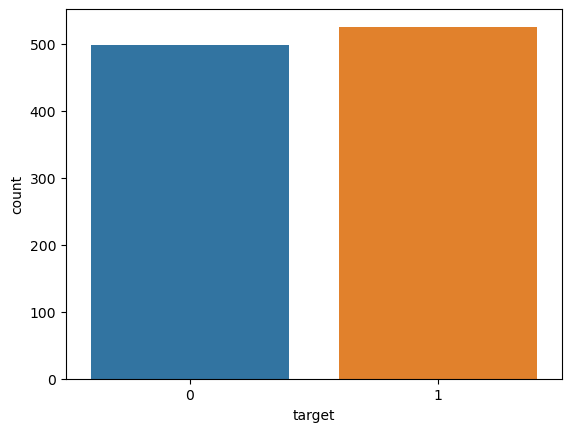

In [7]:
sns.countplot(x=heart_data["target"])

# distribution of target

In [8]:
#sns.pairplot(heart_data, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

# pair plot in dataset of outcome with all columns

<Axes: >

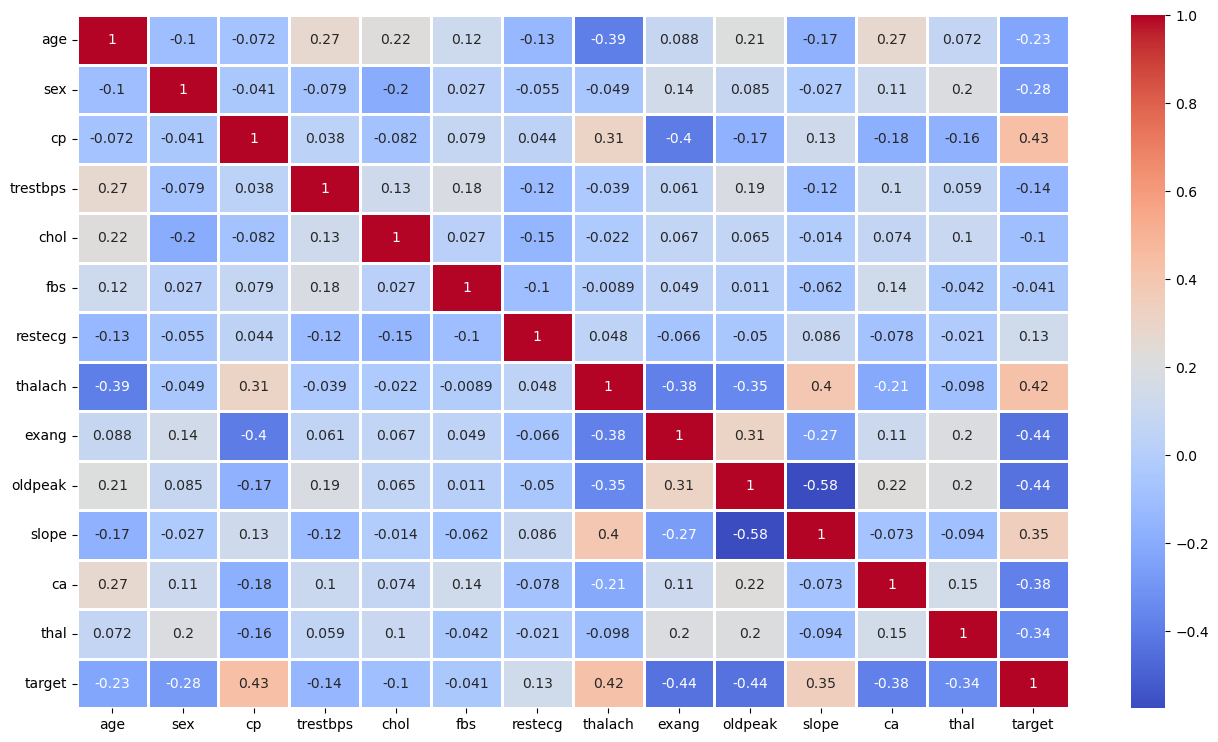

In [9]:
plt.figure(figsize= (16,9))
sns.heatmap(heart_data.corr(), annot = True, cmap='coolwarm', linewidths = 2)

here, we have approx equal distribution of data.

#### Notation for Healthy and Defective Heart

- 1 Represents a Defective Heart
- 0 Represents a Healthy Heart


#### Splitting the Features and Target

In [10]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [11]:
Y = heart_data['target']

# Y contains one column which includes output for validating the result after model prediction

#### Data Standardization

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)
X_standard = scaler.transform(X)

### Splitting the Data into Training data and Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size = 0.20, stratify = Y, random_state = 0 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 20 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

In [15]:
# checking shape of splitted data

print(X_standard.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


### Model Training


### 1. Logistic Regression



In [16]:
# instantiate the model
lr = LogisticRegression()

# training the LogisticRegression model with training data
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print (classification_report(Y_test, y_pred))

Model accuracy score: 0.8049
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.82      0.80      0.81       105

    accuracy                           0.80       205
   macro avg       0.80      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205



### 2. Naive Bayes Classifier

In [17]:
# instantiate the model
gnb = GaussianNB()
# model = gnb

# fit the model
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print (classification_report(Y_test, y_pred))

Model accuracy score: 0.8195
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.83      0.82      0.82       105

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



### 3. K-Nearest Neighbor (KNN)

In [18]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print (classification_report(Y_test, y_pred))

Model accuracy score: 0.8390
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       100
           1       0.84      0.85      0.84       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



### 4. Decision Tree Classifier

In [19]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(max_depth=3)


# fit the model
dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print (classification_report(Y_test, y_pred))

Model accuracy score: 0.8488
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.86      0.85      0.85       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



### 5. Support Vector Machine 

In [20]:
# instantiate the model
svm = SVC() 

# fitting x samples and y classes
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print (classification_report(Y_test, y_pred))

Model accuracy score: 0.8829
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       100
           1       0.86      0.91      0.89       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## Multi-model training

In [21]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
estimators=[('KNN', knn), ('CART', dtc), ('SVM', svm), ('Gaussian NB', gnb), ('Logistic Regression', lr)],
voting='hard')
voting_clf.fit(X_train, Y_train)
Voting_pred = voting_clf.predict(X_test)
print("Majority Voting Ensemble Predicted Value:", Voting_pred)
print (classification_report(Y_test, Voting_pred))
print(confusion_matrix(Y_test, Voting_pred))
cross_val_score(voting_clf, X_standard, Y, cv=20, scoring="accuracy")

Majority Voting Ensemble Predicted Value: [0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       100
           1       0.84      0.88      0.86       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

[[83 17]
 [13 92]]


array([0.92307692, 0.90384615, 0.92307692, 0.96153846, 0.94230769,
       0.92156863, 0.88235294, 0.8627451 , 0.88235294, 0.88235294,
       0.84313725, 0.98039216, 0.78431373, 0.90196078, 0.84313725,
       0.88235294, 0.82352941, 0.82352941, 0.78431373, 0.84313725])

In [22]:
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)

In [23]:
classification = {
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Gradient Boosting Classifier' : gbdt
}

In [24]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision,recall,f1score, matrix

In [25]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision,curr_recall,curr_f1score, matrix = train_classifier(cls, X_train, Y_train, X_test, Y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Recall : ", curr_recall)
  print("F1 Score : ", curr_f1score)
  print("Confusin-Matrix : ", '\n', matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)
  recall_scores.append(curr_recall)
  f1_scores.append(curr_f1score)

Model name :  AdaBoost Classifier
Accuracy :  0.9024390243902439
Precision :  0.9047619047619048
Recall :  0.9047619047619048
F1 Score :  0.9047619047619048
Confusin-Matrix :  
 [[90 10]
 [10 95]] 

Model name :  Bagging Classifier
Accuracy :  0.9853658536585366
Precision :  1.0
Recall :  0.9714285714285714
F1 Score :  0.9855072463768115
Confusin-Matrix :  
 [[100   0]
 [  3 102]] 

Model name :  Gradient Boosting Classifier
Accuracy :  0.9219512195121952
Precision :  0.9158878504672897
Recall :  0.9333333333333333
F1 Score :  0.9245283018867924
Confusin-Matrix :  
 [[91  9]
 [ 7 98]] 



In [26]:
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores, 'Recall' : recall_scores, 'F1 Score' : f1_scores}).sort_values('Accuracy', ascending =True)

In [27]:
result_dataframe

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,AdaBoost Classifier,0.902439,0.904762,0.904762,0.904762
2,Gradient Boosting Classifier,0.921951,0.915888,0.933333,0.924528
1,Bagging Classifier,0.985366,1.000000,0.971429,0.985507


### Model Improvement

In [28]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.


abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)


In [29]:
voting = VotingClassifier(estimators=[('abc', abc), ('bc', bc), ('gbdt', gbdt)],voting='soft')

In [30]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('abc', AdaBoostClassifier(random_state=2)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2))],
                 voting='soft')

In [41]:
y_pred = voting.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print("Precision Score: ",precision_score(Y_test, y_pred))
print("F1 Score: ",f1_score(Y_test, y_pred))
print("Recall Score: ",recall_score(Y_test, y_pred))

# voting model is most accurate and precise


0.9902439024390244
[[100   0]
 [  2 103]]
Precision Score:  1.0
F1 Score:  0.9903846153846153
Recall Score:  0.9809523809523809


## Comparison with other implemented classifiers

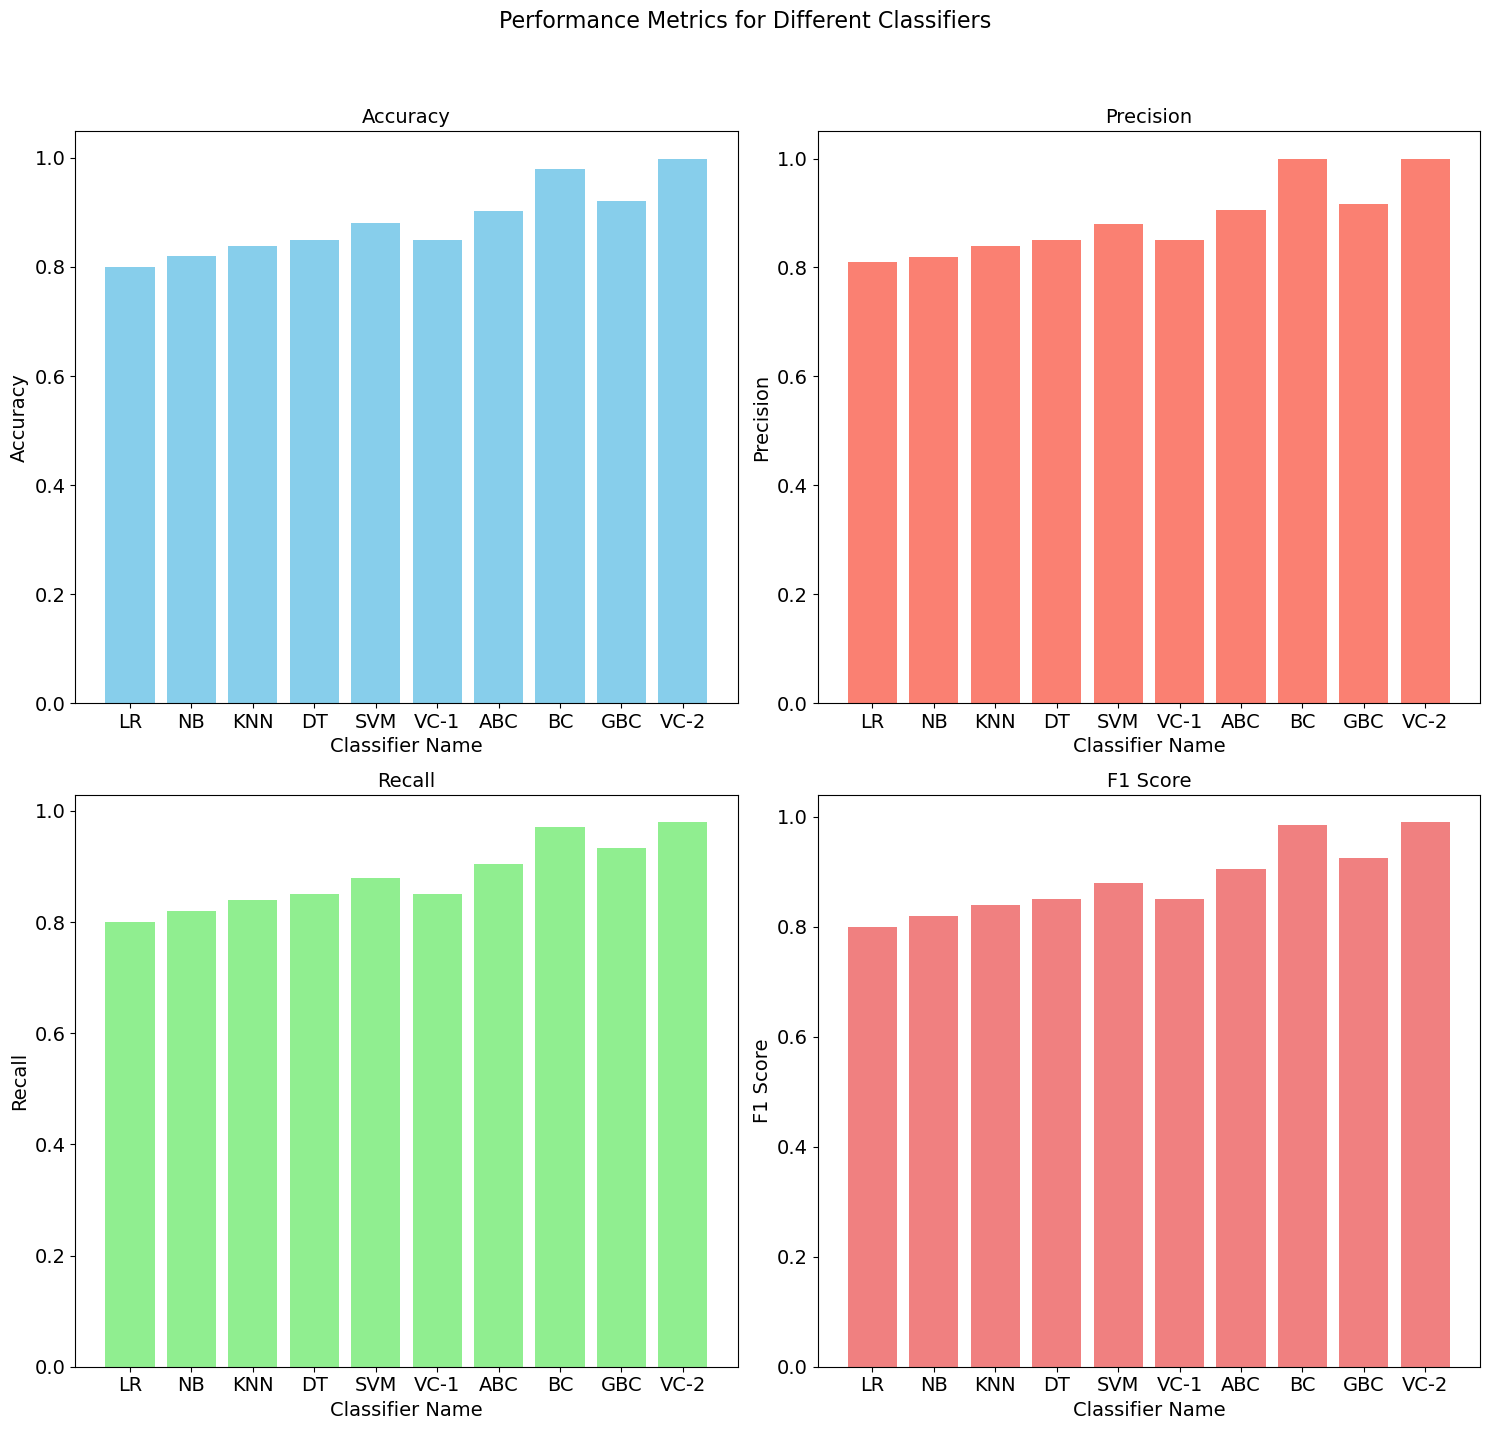

In [44]:
data = {
    
    'Classifier Name': ['LR','NB','KNN','DT','SVM','VC-1','ABC','BC','GBC','VC-2'],
    'Accuracy': [0.80, 0.8195, 0.8390, 0.85, 0.88, 0.85, 0.9024, 0.98, 0.92, 0.9987],
    'Precision': [0.81, 0.82, 0.84, 0.85, 0.88, 0.85, 0.9047, 1, 0.9158, 1],
    'Recall': [0.80, 0.82, 0.84, 0.85, 0.88, 0.85, 0.9047, 0.9714, 0.9333, 0.98],
    'F1 Score': [0.80, 0.82, 0.84, 0.85, 0.88, 0.85, 0.9047, 0.9855, 0.9247, 0.99]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Increase font size
font_size = 14

# Plotting all metrics in one figure
plt.figure(figsize=(15, 15))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.bar(df['Classifier Name'], df['Accuracy'], color='skyblue')
plt.title('Accuracy', fontsize=font_size)
plt.xlabel('Classifier Name', fontsize=font_size)
plt.ylabel('Accuracy', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Plot precision
plt.subplot(2, 2, 2)
plt.bar(df['Classifier Name'], df['Precision'], color='salmon')
plt.title('Precision', fontsize=font_size)
plt.xlabel('Classifier Name', fontsize=font_size)
plt.ylabel('Precision', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Plot recall
plt.subplot(2, 2, 3)
plt.bar(df['Classifier Name'], df['Recall'], color='lightgreen')
plt.title('Recall', fontsize=font_size)
plt.xlabel('Classifier Name', fontsize=font_size)
plt.ylabel('Recall', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Plot F1 score
plt.subplot(2, 2, 4)
plt.bar(df['Classifier Name'], df['F1 Score'], color='lightcoral')
plt.title('F1 Score', fontsize=font_size)
plt.xlabel('Classifier Name', fontsize=font_size)
plt.ylabel('F1 Score', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Overall title
plt.suptitle('Performance Metrics for Different Classifiers', fontsize=font_size + 2)
# Save the figure as a PNG file
plt.savefig('performance_metrics.png')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Model Evaluation

- Accuracy score
  - 1. For training data
  - 2. For testing data

  accuracy score for both should be closer to 1

- Other Metrices:
  - 1. Accuracy
  - 2. Precision
  - 3. Recall
  - 4. F1 Score

- Confusion Metrix
  

In [32]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  0.998780487804878


In [33]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  0.998780487804878


In [34]:
# Accuracy, F1, Recall, Precision

Y_pred = voting.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 0.9902439024390244
Precision  : 1.0
Recall     : 0.9809523809523809
F1-score   : 0.9903846153846153


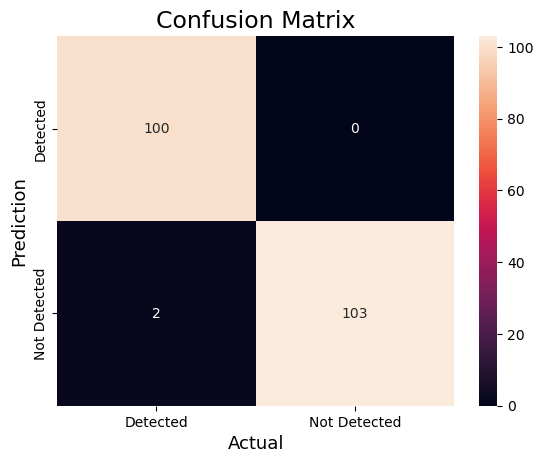

In [35]:
# confusion matrix

cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Detected', 'Not Detected'],
            yticklabels=['Detected', 'Not Detected'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Building Prediction system

#### Steps :

  - take input data
  - Process the data, change into array
  - reshape data as single element in array
  - predict output using predict function
  - output the value

In [36]:
# input feature values
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# changing data to numpy array
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)

# standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data[0])


In [37]:
# predicting the result and printing it

prediction = voting.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart")

else:
    print("Patient has a heart Disease")

[0]
Patient has a healthy heart


### Notations
  - [0] : means patient has a healthy heart 
  - [1] : means patient has a unhealthy heart 
  

## Saving the model

In [38]:
import pickle
# importing the library

filename = "trained_model.pkl"
pickle.dump(voting, open(filename, 'wb'))
# saving file


In [39]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl",'rb'))

In [40]:
# save the model to disk
filename = 'heart_model.sav'
joblib.dump(voting, filename)

['heart_model.sav']